## 기울기 소실과 LSTM

① **Memory cell**($\mathbf{c_t}$): **LSTM 전용의 기억 메커니즘**

- LSTM 계층 내에서만 주고 받고, 다른 계층으로 출력하지 않음.
- $t$기의 기억 셀 $\mathbf{c_t}$에는 과거에서 $t$까지에 필요한 모든 정보가 저장되도록 학습을 수행.
- 3개의 입력 ($\mathbf{c_{t-1}}, \mathbf{h_{t-1}, \mathbf{x_{t}}}$)으로부터 계산을 수행.
    - 어떤 계산?


$\mathbf{h_{t}} = \tanh(\mathbf{c_{t}})$ ⇒ 갱신된 $\mathbf{c_{t}}$를 사용하여 은닉상태 $\mathbf{h_{t}}$를 계산한다.

- NOTICE
    
    생각해보면 기억 셀과 은닉 상태의 원소 수가 같을 수 밖에 없다.
    

② **새로운 기억 셀($\mathbf{g_{}}$)**

- 새로 기억해야 할 정보를 기억 셀에 추가한다.
- tanh 노드를 추가(Gate가 아님) ⇒ 새로운 ‘정보’를 기억 셀에 추가

$\mathbf{g} = \sigma(\mathbf{x_{t}}\mathbf{W_{x}}^{(\mathbf{g})}\mathbf{+} \mathbf{h_{t-1}}\mathbf{W_{h}}^{(\mathbf{g})} + \mathbf{b}^{\mathbf{(g)}})$

⇒ 이 $\mathbf{g}$가 $\mathbf{c_{t-1}}$에 더해짐으로써 새로운 기억 셀 $\mathbf{c_{t}}$이 생겨난다.

### LSTM의 Gate

- **tanh와 sigmoid를 사용하는 이유(간단)**
    1. tanh의 출력은 -1.0 ~ 1.0의 실수. ‘정보’의 정도(강약)을 표시. ⇒ 실질적 정보를 지닌 데이터에는 tanh을 사용.
    2. sigmoid의 출력은 0.0 ~ 1.0의 실수. ‘정보’를 얼마만큼 보낼지 결정 ⇒ 게이트에서 사용.

GATE: openess(열림 상태)를 결정한다.

   정보의 흐름을 제어하며 정보가 어느 정도 흐를지 말지 조절할 수 있다.

1. **Output gate**(은닉상태 $\mathbf{h_{t}}$의 **출력**을 담당)
    - $\tanh(\mathbf{c_{t}})$에 게이트를 적용함으로써 $\tanh(\mathbf{c_{t}})$의 각 원소에 대해 ‘그것이 다음 time step의 hidden state에 얼마나 중요한가’를 조정.
    - $\mathbf{o} = \sigma(\mathbf{x_{t}}\mathbf{W_{x}}^{(\mathbf{o})}\mathbf{+} \mathbf{h_{t-1}}\mathbf{W_{h}}^{(\mathbf{o})} + \mathbf{b}^{\mathbf{(o)}})$
        - input: $\mathbf{x_{t}}$, previous hidden state: $\mathbf{h_{t-1}}$ ⇒ **o**를 계산
    
    $\mathbf{h_{t}} = \mathbf{o} \odot \tanh(\mathbf{c_{t}})$ 계산한 **O** 와 tanh(c)를 **아다마르 곱(원소곱)** 하여 $\mathbf{h_{t}}$를 계산.
    
2. **Forget gate**($\mathbf{c_{t}}$에서 불필요한 정보를 삭제)
    - $\mathbf{f} = \sigma(\mathbf{x_{t}}\mathbf{W_{x}}^{(\mathbf{f})}\mathbf{+} \mathbf{h_{t-1}}\mathbf{W_{h}}^{(\mathbf{f})} + \mathbf{b}^{\mathbf{(f)}})$
    
    $\mathbf{c_{t}} = \mathbf{f} \odot \mathbf{c_{t-1}}$을 계산하여 $\mathbf{c_{t}}$를 구할 수 있다. 
    
3. **Input gate(새로 추가되는 정보의 가치를 판단)**
    - $\mathbf{g}$의 각 원소가 새로 추가되는 정보로써의 가치가 얼마나 큰지 판단한다.
        - 새로 들어오는 정보를 모두 고려하는 것이 아닌, 적절히 선택하여 수용.
    
    $\mathbf{i} = \sigma(\mathbf{x_{t}}\mathbf{W_{x}}^{(\mathbf{i})}\mathbf{+} \mathbf{h_{t-1}}\mathbf{W_{h}}^{(\mathbf{i})} + \mathbf{b}^{\mathbf{(i)}})$
    
    ⇒ $\mathbf{i} \odot \mathbf{g}$의 결과를 기억 셀 $\mathbf{c_{t}}$에 추가한다.



   
   
## LSTM의 기울기 흐름

LSTM은 어떤 원리로 gradient vanishing problem을 막을 수 있을까? ⇒ $\mathbf{c_t}$에 집중해보자
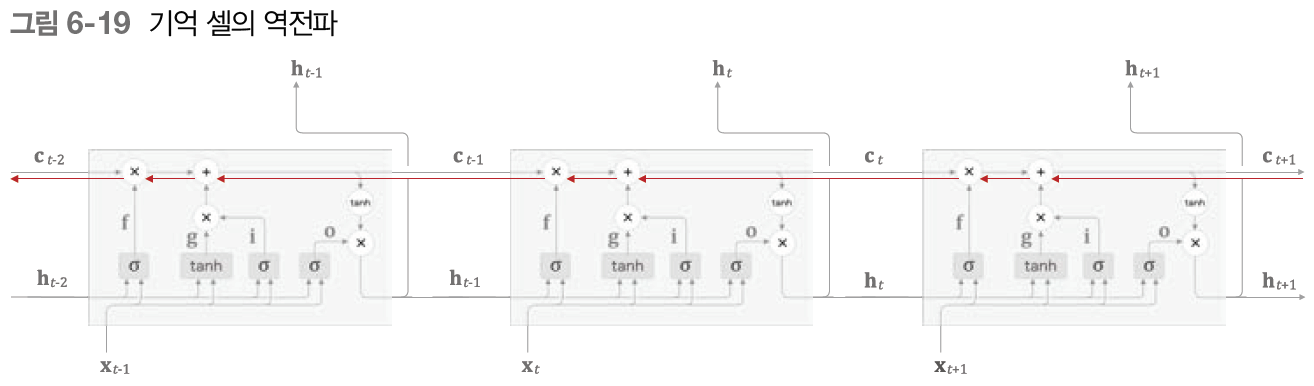

Memory cell($\mathbf{c_t}$) ⇒ 역전파 때 ‘+’와 ‘x’노드만 존재.

1. $+$: 상류의 기울기를 그대로 보냄. gradient에 영향X
2. X : LSTM에서는 행렬곱(matmul)이 아닌 원소별 곱(아다마르 곱)을 사용한다. 
    - RNN의 역전파와 다른점
        - RNN에서는 똑같은 가중치 행렬을 사용하여 ‘행렬 곱’을 반복 ⇒ 기울기 소실이 일어남
        - LSTM에서는 매 시각 다른 게이트 값을 이용해 원소별 곱을 계산 ⇒ 매번 새로운 게이트 값을 이용하므로 곱셈의 효과가 누적되지 않기 때문에 기울기 소실이 일어나기 어렵다.
- ‘X’노드 계산은 **Forget Gate**가 제어.
    - forget gate 값과 직전의 memory cell($\mathbf{c_{t-1}}$)을 곱하여 다음 memory cell($\mathbf{c_t}$)이 만들어 진다.
    - 이 점을 다시 생각해보면
        - forget gate가 작은 값 ⇒ 정보를 작게 보내야함(잊어야 함) ⇒ 기울기가 작아짐
        - forget gate가 큰 값 ⇒ 정보를 많이 보내야함(잊으면 안됨) ⇒ 기울기가 작아지지 않음
    
    결과적으로 memory cell이 장기 의존 관계를 학습할 수 있을 것이다.

## LSTM 구현
- 행렬을 사용하여 한번에!
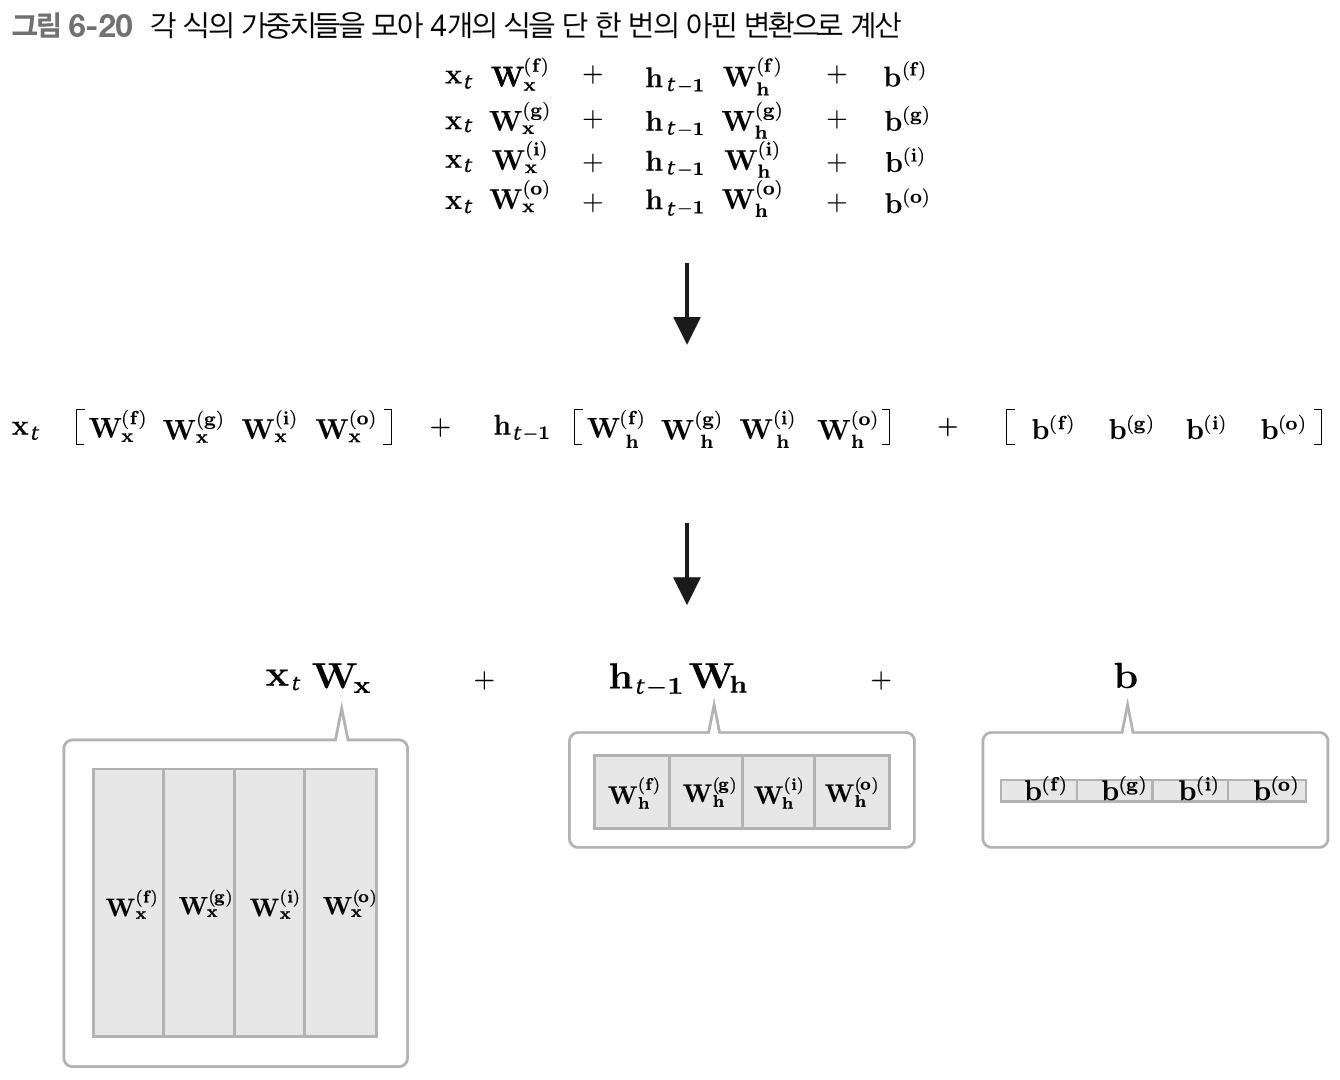

In [1]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
    
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out #sigmoid를 미분
        return dx

In [2]:
import numpy as np

class LSTM:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None
        
    def forward(self, x, h_prev, c_prev):
        Wx, Wh, b = self.params
        N, H = h_prev.shape
        
        A = np.matmul(x, Wx) + np.matmul(h_prev, Wh) + b
        
        #slice
        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]
        
        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)
        
        c_next = f* c_prev + g * i
        h_next = o * np.tanh(c_next)
        
        self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
        
        return h_next, c_next

### 코드 뜯어보기
- Shape을 잘 살펴보자 
    - $\bf x_t$: 입력 데이터
    - 이 데이터의 미니배치 수를 $N$, 입력 데이터 차원의 수를 $D$라고 하자.
    - ```h_prev```의 shape을 (N, H)라 하면 
        - Wh의 shape은 (H, 4H)가 될 것이다.
        - gate 3개(forgate, output, input) + g
        - g에서만 tanh를 쓰고 3개의 게이트에서는 sigmoid 사용함!
    - 그래서 처음 H까지를 forget gate, H ~ 2H까지를 g, 2H ~ 3H까지 input gate, 3H~ 끝까지 output gate의 가중치로 사용한다.

## LSTM을 여러개 한꺼번에 처리하는 신경망

In [3]:
class TimeLSTM:
    def __init__(self, Wx, Wh, b, stateful = False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None
        self.h, self,c = None, None
        self.dh = None
        self.stateful = stateful
        
    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        H = Wh.shape[0]
        
        self.layers = []
        hs = np.empty((N, T, H), dtype = 'f')
        
        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype = 'f')
        if not self.stateful or self.c is None:
            self.c = np.zeros((N, H), dtype = 'f')
            
        for i in range(T):
            layer = LSTM(*self.params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h
            
            self.layers.append(layer)
        
        return hs
    
    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D = Wx.shape[0]
        
        dxs = np.empty((N, T, D), dtype = 'f')
        dh, dc = 0, 0
        
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
            dxs[:, t, :] = dx
            for i, grad in enumerate(layer.grads):
                grads[i] += grad 
                
        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        
        return dxs
    
    def set_state(self, h, c = None):
        self.h, self.c = h, c
        
    def reset_state(self):
        self.h, self.c = None, None